##Cascade Classifier

In [1]:
from __future__ import print_function
import cv2 as cv
import argparse

In [3]:
def detectAndDisplay(frame):
    # Преобразование изображения в оттенки серого
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)

    # Обнаружение лиц
    faces = face_cascade.detectMultiScale(frame_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv.CASCADE_SCALE_IMAGE)
    for (x, y, w, h) in faces:
        center = (x + w // 2, y + h // 2)
        # Рисование эллипса вокруг лица
        frame = cv.ellipse(frame, center, (w // 2, h // 2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y + h, x:x + w]

        # Обнаружение глаз в области лица
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2, y2, w2, h2) in eyes:
            eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            radius = int(round((w2 + h2) * 0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0), 4)

    # Отображение результата
    cv.imshow('Capture - Face detection', frame)

# Аргументы командной строки
parser = argparse.ArgumentParser(description='Code for Cascade Classifier tutorial.')
parser.add_argument('--face_cascade', help='Path to face cascade.', default='haarcascade_frontalface_alt.xml')
parser.add_argument('--eyes_cascade', help='Path to eyes cascade.', default='haarcascade_eye_tree_eyeglasses.xml')
parser.add_argument('--camera', help='Camera divide number.', type=int, default=0)
args = parser.parse_args()

# Пути к XML-файлам каскадов
face_cascade_name = args.face_cascade
eyes_cascade_name = args.eyes_cascade

# Загрузка каскадов
face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()

if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)

# Захват видео с камеры
camera_device = args.camera
cap = cv.VideoCapture(camera_device)

if not cap.isOpened():
    print('--(!)Error opening video capture')
    exit(0)

while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break

    # Обработка текущего кадра
    detectAndDisplay(frame)

    # Выход по нажатию клавиши "Esc"
    if cv.waitKey(10) == 27:
        break

# Освобождение ресурсов
cap.release()
cv.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\persistence.cpp:2171: error: (-215:Assertion failed) isMap() in function 'cv::FileNode::operator []'


##Hough Line Transform

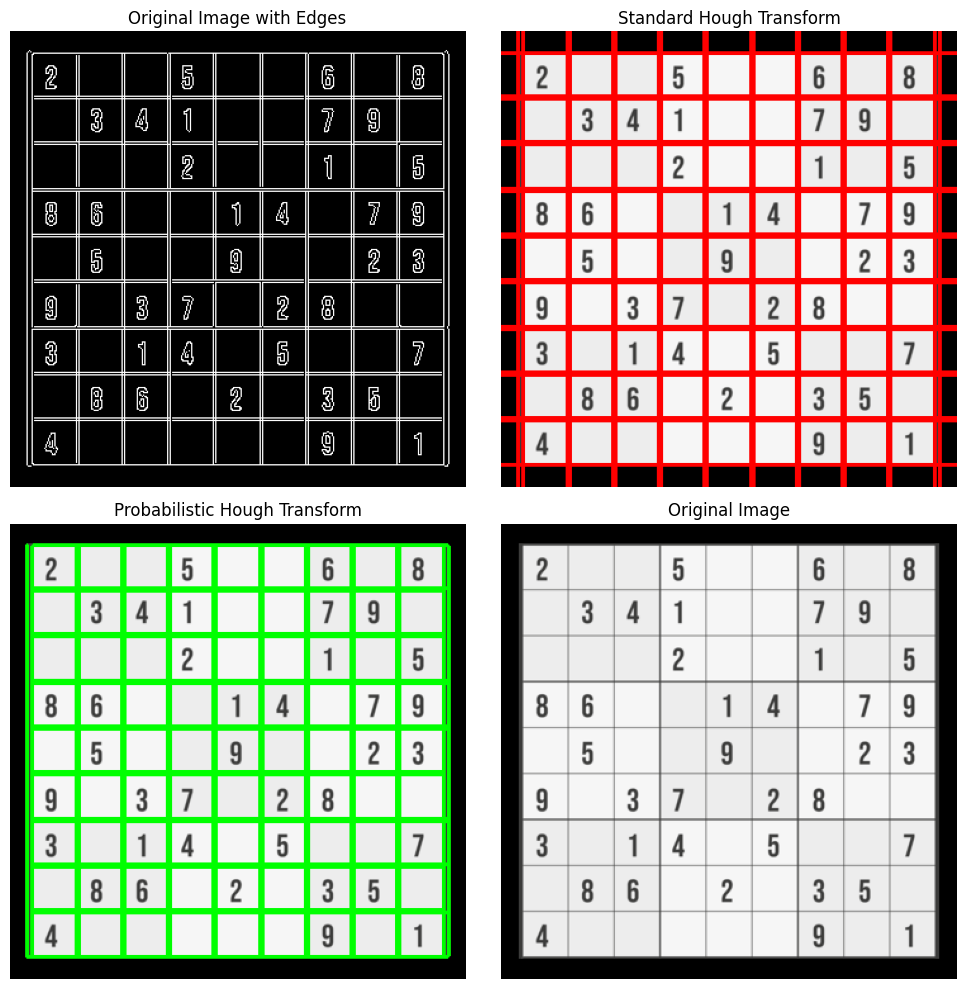

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Загрузка изображения
img = cv.imread(cv.samples.findFile('sudoku.png'))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Обнаружение границ с помощью Canny
edges = cv.Canny(gray, 50, 150, apertureSize=3)

# --- Стандартное преобразование Хафа ---
# Параметры: rho=1, theta=π/180, threshold=200
lines = cv.HoughLines(edges, 1, np.pi / 180, 200)

# Копия изображения для стандартного Хафа
img_standard_hough = img.copy()

# Отрисовка линий, найденных стандартным преобразованием Хафа
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(img_standard_hough, (x1, y1), (x2, y2), (0, 0, 255), 2)

# --- Вероятностное преобразование Хафа ---
# Параметры: rho=1, theta=π/180, threshold=100, minLineLength=100, maxLineGap=10
linesP = cv.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

# Копия изображения для вероятностного Хафа
img_prob_hough = img.copy()

# Отрисовка линий, найденных вероятностным преобразованием Хафа
if linesP is not None:
    for line in linesP:
        x1, y1, x2, y2 = line[0]
        cv.line(img_prob_hough, (x1, y1), (x2, y2), (0, 255, 0), 2)

# --- Отображение результатов через matplotlib ---
# Исходное изображение с границами
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('Original Image with Edges')
plt.imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')

# Результат стандартного преобразования Хафа
plt.subplot(2, 2, 2)
plt.title('Standard Hough Transform')
plt.imshow(cv.cvtColor(img_standard_hough, cv.COLOR_BGR2RGB))
plt.axis('off')

# Результат вероятностного преобразования Хафа
plt.subplot(2, 2, 3)
plt.title('Probabilistic Hough Transform')
plt.imshow(cv.cvtColor(img_prob_hough, cv.COLOR_BGR2RGB))
plt.axis('off')

# Исходное изображение
plt.subplot(2, 2, 4)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


##Hough Circle Transform

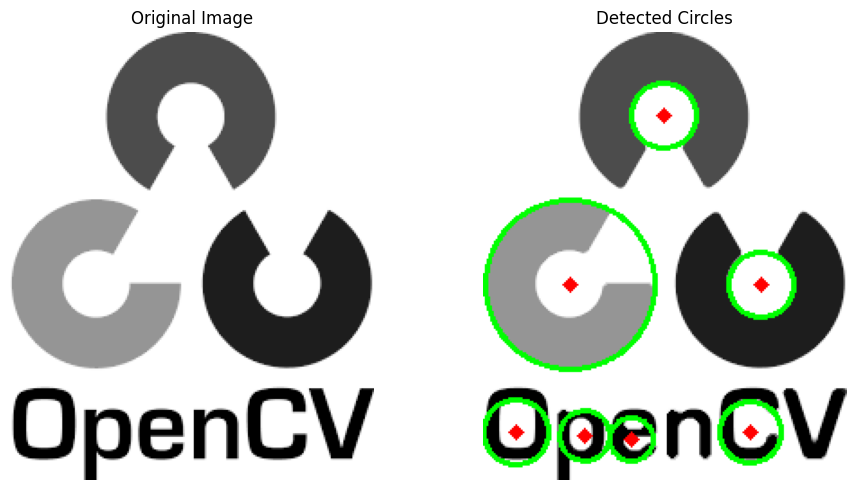

In [5]:
# Загрузка изображения
img = cv.imread('images.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Файл не найден. Проверьте путь с помощью os.path.exists()."

# Применение медианного размытия для уменьшения шума
img_blur = cv.medianBlur(img, 5)

# Преобразование в цветное изображение для визуализации
cimg = cv.cvtColor(img_blur, cv.COLOR_GRAY2BGR)

# Применение преобразования Хафа для поиска окружностей
circles = cv.HoughCircles(
    img_blur,
    cv.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50,
    param2=30,
    minRadius=0,
    maxRadius=0
)

# Проверка, найдены ли окружности
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Рисуем внешние окружности
        cv.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Рисуем центры окружностей
        cv.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

# --- Отображение результатов через matplotlib ---
plt.figure(figsize=(10, 5))

# Оригинальное изображение
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')

# Изображение с найденными окружностями
plt.subplot(1, 2, 2)
plt.title('Detected Circles')
plt.imshow(cv.cvtColor(cimg, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()
